In [11]:
# IMPORTS

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [12]:
data = pd.read_csv('src/clean_adult.csv')

In [13]:
# CHECK FOR INTEGRITY

In [14]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30689,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,United-States,<=50K
30690,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,United-States,<=50K
30691,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,United-States,>50K
30692,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,United-States,<=50K


In [15]:
label_encoder = LabelEncoder()

categorical_cols = ['income', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)

In [16]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,native.country,income
0,82,2,132870,11,9,6,3,1,4,0,0,4356,39,0
1,54,2,140359,5,4,0,6,4,4,0,0,3900,39,0
2,41,2,264663,15,10,5,9,3,4,0,0,3900,39,0
3,34,2,216864,11,9,0,7,4,4,0,0,3770,39,0
4,38,2,150601,0,6,5,0,4,4,1,0,3770,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30689,22,2,310152,15,10,4,10,1,4,1,0,0,39,0
30690,27,2,257302,7,12,2,12,5,4,0,0,0,39,0
30691,40,2,154374,11,9,2,6,0,4,1,0,0,39,1
30692,58,2,151910,11,9,6,0,4,4,0,0,0,39,0


In [17]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['income']), data['income'], test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [20]:
# ACCURACY SCORE
accuracy_score(y_test, y_pred)

0.8537221045772927

In [21]:
# CLASSIFICATION REPORT
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4699
           1       0.72      0.62      0.67      1440

    accuracy                           0.85      6139
   macro avg       0.80      0.77      0.79      6139
weighted avg       0.85      0.85      0.85      6139


<Axes: >

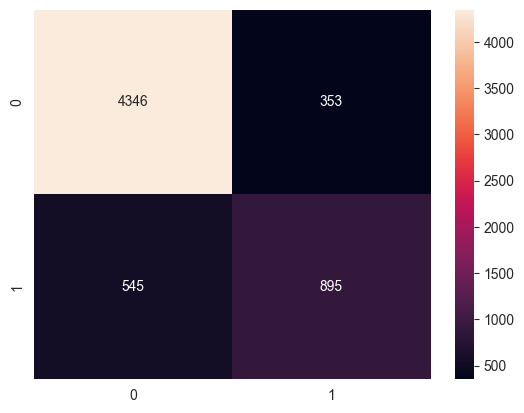

In [22]:
# CONFUSION MATRIX
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [23]:
# XGBOOST CLASSIFIER

In [24]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

C:\Users\Samson\OneDrive - samxhavier\Desktop\FinalProject-AI\venv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [25]:
# ACCURACY SCORE
accuracy_score(y_test, y_pred)

0.8705000814464896

In [26]:
# CLASSIFICATION REPORT
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4699
           1       0.76      0.65      0.70      1440

    accuracy                           0.87      6139
   macro avg       0.83      0.79      0.81      6139
weighted avg       0.87      0.87      0.87      6139


<Axes: >

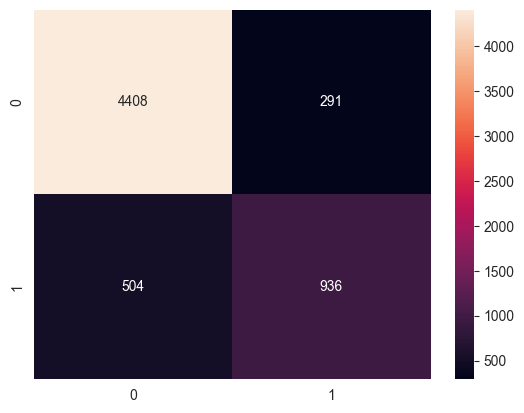

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [28]:
# SUPPORT VECTOR MACHINES

In [29]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [30]:
# ACCURACY SCORE
accuracy_score(y_test, y_pred)

0.8460661345496009

In [31]:
# CLASSIFICATION REPORT
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4699
           1       0.73      0.54      0.62      1440

    accuracy                           0.85      6139
   macro avg       0.80      0.74      0.76      6139
weighted avg       0.84      0.85      0.84      6139


<Axes: >

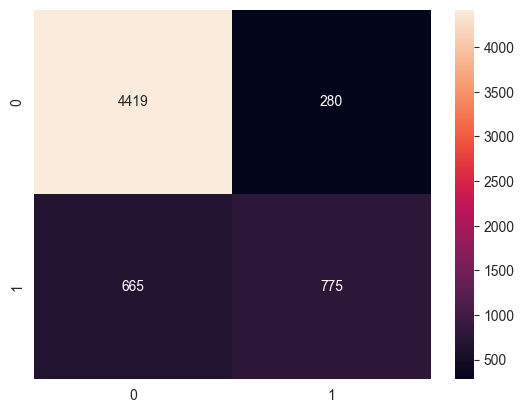

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [33]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred = logistic_reg.predict(x_test)

In [35]:
# ACCURACY SCORE
accuracy_score(y_test, y_pred)

0.8247271542596514

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4699
           1       0.70      0.45      0.54      1440

    accuracy                           0.82      6139
   macro avg       0.77      0.69      0.72      6139
weighted avg       0.81      0.82      0.81      6139


<Axes: >

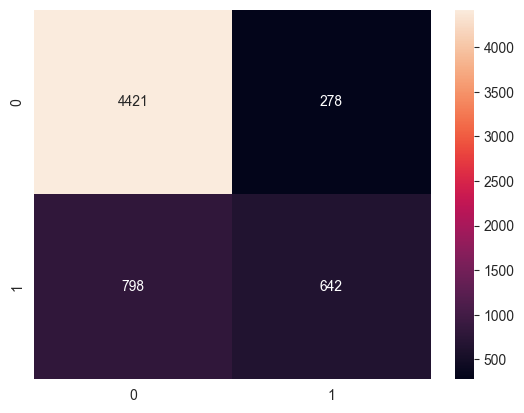

In [37]:
# CONFUSION MATRIX
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [38]:
# RESULTS {
#   RANDOM-FORESTS = 0.8651246131291741
#   XGBOOST CLASSIFIER = 0.8669164359016126
#   SUPPORT VECTOR MACHINES = 0.8468805994461639
#   LOGISTIC REGRESSION = 0.8247271542596514

# AS A RESULT, XGBOOST-CLASSIFIER OBTAINS THE HIGHEST ACCURACY -->
# |---------------------|
# |  0.8669164359016126 |
# |---------------------|
#
# IT'S ALSO NOTED THAT THESE VALUES AREN'T CONSTANT BUT XGBOOST ALWAYS HAD THE HIGHEST ACCURACY...
# AS SO, IT'S SAFE TO ASSUME THE XGBOOST AS THE... WINNER :)